In [1]:
from sklearn2pmml import sklearn2pmml
import pandas as pd
from sklearn2pmml.pipeline import PMMLPipeline
import matplotlib.pyplot as plt # visualization

**Don't forget to change root**

In [2]:
root = "/home/sihartist/Desktop/"
path = root + "fraud-detection/dataset/preprocessing_data.xlsx"

Useful function for evaluation

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve, average_precision_score
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef

def performance_report(model, X, y_true, target_names=None):
        y_pred = model.predict(X)
        
        score_tr = model.score(X, y_true)
        print('Accuracy Score: ', score_tr)
        print("")
        bal_acc_te = balanced_accuracy_score(y_true, y_pred)
        print('Balanced Accuracy: ', bal_acc_te)
        print("")
        mat_corr_coeff_te = matthews_corrcoef(y_true, y_pred)
        print('Matthews Correlation Coefficient: ', mat_corr_coeff_te)
        print("")

        print(classification_report(y_true, y_pred, target_names=target_names))
        print('--------------------------------------------------------')

        matrix = plot_confusion_matrix(model, X, y_true, cmap=plt.cm.Blues, display_labels=target_names)
        matrix.ax_.set_title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks(rotation=90)
        plt.show()
        print("")

## Model SVM

In [5]:
df = pd.read_excel(path)

#df = df.iloc[:,1:]

df.head()

,V1,V2,V3,V4,V9,V10,V12,V13,V16,V19,...,V7_month,V7_day,V23_month,V23_day,V8_month,V8_day,V6_year,V7_year,V23_year,V8_year
0,4,2,23,1,285328,33443.0,19,2976,44,20238,...,0.201299,0.980307,0.201299,0.980307,-0.525049,-0.937752,2009,2009,2009,2009
1,4,2,23,1,483993,652487.0,19,2976,44,1352,...,0.201299,0.980307,0.201299,0.980307,-0.368810,0.937752,2009,2009,2009,2009
2,4,2,23,1,713040,554381.0,19,2976,44,25276,...,0.201299,0.980307,0.201299,0.980307,-0.893709,-0.937752,2009,2009,2009,2009
3,4,2,23,1,592014,778437.0,19,2976,44,24482,...,0.201299,0.980307,0.201299,0.980307,-0.996172,-0.937752,2009,2009,2009,2009
4,4,2,23,1,18805,314278.0,19,2976,44,16915,...,0.201299,0.980307,0.201299,0.980307,-0.996172,-0.937752,2009,2009,2009,2009


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140654 entries, 0 to 140653
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V1         140654 non-null  int64  
 1   V2         140654 non-null  int64  
 2   V3         140654 non-null  int64  
 3   V4         140654 non-null  int64  
 4   V9         140654 non-null  int64  
 5   V10        140654 non-null  float64
 6   V12        140654 non-null  int64  
 7   V13        140654 non-null  int64  
 8   V16        140654 non-null  int64  
 9   V19        140654 non-null  int64  
 10  V21        140654 non-null  int64  
 11  V22        140654 non-null  int64  
 12  V24        140654 non-null  int64  
 13  V25        140654 non-null  int64  
 14  V26        140654 non-null  int64  
 15  V27        140654 non-null  int64  
 16  CLASS      140654 non-null  int64  
 17  V6_month   140654 non-null  float64
 18  V6_day     140654 non-null  float64
 19  V7_month   140654 non-n

In [10]:
# Split the data into features and target variable
X = df.drop("CLASS", axis=1)
X_cols = df.drop("CLASS", axis=1).columns.values
y = df["CLASS"]

X = X.values
y = y.values

print(X.shape)
print(y.shape)

(140654, 28)
(140654,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Train the model with PMML wraper
clf = PMMLPipeline(
    [
        (
            "Standard Scaler",
            StandardScaler()
        )
        ,
        (
            "SVM",
            SVC(gamma='auto')
        )
    ]
)

X_train = pd.DataFrame(X_train, columns = list(X_cols))
y_train = pd.Series(y_train, name = "isFraud")
X_test = pd.DataFrame(X_test, columns = list(X_cols))
y_test = pd.Series(y_test, name = "isFraud")

# Train the model
clf.fit(X_train, y_train)

PMMLPipeline(steps=[('Standard Scaler', StandardScaler()),
       ('SVM', SVC(gamma='auto'))])

### testing model

Accuracy Score:  0.9014133057566357

Balanced Accuracy:  0.9012189226092875

Matthews Correlation Coefficient:  0.8160929193100123

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     23258
           1       0.99      0.81      0.89     23158

    accuracy                           0.90     46416
   macro avg       0.91      0.90      0.90     46416
weighted avg       0.91      0.90      0.90     46416

--------------------------------------------------------


/home/sihartist/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


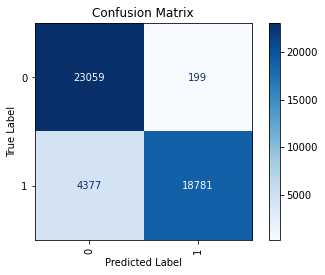

In [13]:
performance_report(clf, X_test, y_test, target_names=None)

## saving model

Pickle

In [15]:
import pickle

filename = root + "fraud-detection/models/svm.pkl"
pickle.dump(clf, open(filename, "wb"))

PMML

In [16]:
filename = root + "fraud-detection/models/svm.pmml"
filename_java = root + "SpringAPI/src/main/resources/models/svm.pmml"

sklearn2pmml(clf, filename, with_repr = True)
sklearn2pmml(clf, filename_java, with_repr = True)

## loading model

In [18]:
from pypmml import Model

In [26]:
loaded_model = Model.load(filename)
loaded_model.predict(X_test.iloc[0])

predicted_isFraud    1.0
probability          1.0
probability_0        0.0
probability_1        1.0
Name: 0, dtype: float64